In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix

In [6]:
%matplotlib inline
sns.set_style('ticks')

In [36]:
X_train = pd.read_csv("Data/X_train.csv")
y_train = pd.read_csv("Data/y_train.csv")
X_test = pd.read_csv("Data/X_test.csv")
y_test = pd.read_csv("Data/y_test.csv")

In [17]:
alphas = 10**np.linspace(10,-2,200)*0.5
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_.reshape(13))

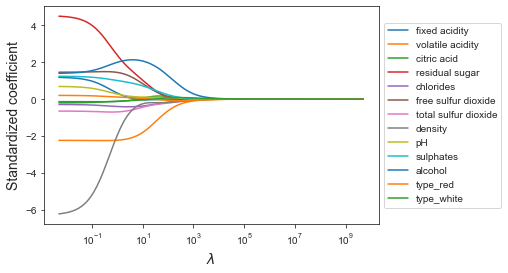

In [18]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=14)
plt.ylabel('ylabel', fontsize=14)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X_train.columns, loc='center left', bbox_to_anchor=(1, 0.5));

In [19]:
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas, store_cv_values=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.01636987568069109

In [20]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

In [21]:
print('Test mse', mean_absolute_error(y_test, pred))
print('Test rmse', np.sqrt(((np.around(pred)-np.array(y_test))**2).mean()))

Test mse 0.585208517330482
Test rmse 1.0827906090092303


## Lasso Model

In [32]:
alphas = 10**np.linspace(0,-5,200)*0.5

#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

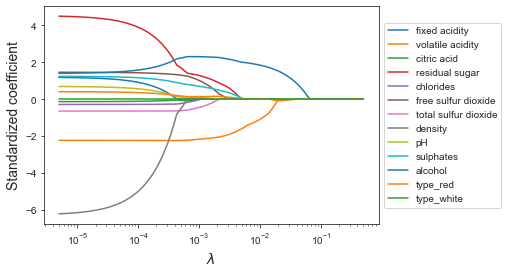

In [37]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=14)
plt.ylabel('ylabel', fontsize=14)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X_train.columns, loc='center left', bbox_to_anchor=(1, 0.5));

In [38]:
y_train = np.array(y_train.values.tolist()).reshape(5197)

In [39]:
alphas = 10**np.linspace(0,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lassocv.alpha_

5e-06

In [40]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)
pred=lasso.predict(X_test)
print('Test mse', mean_absolute_error(y_test, pred))
print('Test rmse', np.sqrt(((np.round(pred)-np.array(y_test))**2).mean()))

Test mse 0.585234662569495
Test rmse 1.0827906090092303
